In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from lightgbm import LGBMClassifier, plot_importance
from sklearn.model_selection import train_test_split

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('./data_preprocessed_binary.csv')

In [4]:
df["식전혈당"].value_counts()

1    924629
0    924629
Name: 식전혈당, dtype: int64

In [5]:
target = df['식전혈당']
data = df.drop(['식전혈당'], axis=1)

parameters = {
    'objective': 'binary',
    'metric': 'binary',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'n_estimators': 400
}

X_train , X_test, y_train , y_test = train_test_split(data, target, test_size=0.25, random_state=0, stratify=target)

evals= [(X_test, y_test)]
model = LGBMClassifier(**parameters)
model.fit(X_train, y_train ,early_stopping_rounds=100, eval_metric = 'logloss', eval_set= evals, verbose =True)

[1]	valid_0's binary_logloss: 0.683378
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.674544
[3]	valid_0's binary_logloss: 0.666442
[4]	valid_0's binary_logloss: 0.659046
[5]	valid_0's binary_logloss: 0.652228
[6]	valid_0's binary_logloss: 0.645984
[7]	valid_0's binary_logloss: 0.640105
[8]	valid_0's binary_logloss: 0.634847
[9]	valid_0's binary_logloss: 0.629681
[10]	valid_0's binary_logloss: 0.625057
[11]	valid_0's binary_logloss: 0.620531
[12]	valid_0's binary_logloss: 0.616507
[13]	valid_0's binary_logloss: 0.61264
[14]	valid_0's binary_logloss: 0.609132
[15]	valid_0's binary_logloss: 0.605724
[16]	valid_0's binary_logloss: 0.602692
[17]	valid_0's binary_logloss: 0.599871
[18]	valid_0's binary_logloss: 0.597092
[19]	valid_0's binary_logloss: 0.594551
[20]	valid_0's binary_logloss: 0.592077
[21]	valid_0's binary_logloss: 0.589912
[22]	valid_0's binary_logloss: 0.587698
[23]	valid_0's binary_logloss: 0.585602
[24]	valid_0's binary_loglos

[202]	valid_0's binary_logloss: 0.529265
[203]	valid_0's binary_logloss: 0.52925
[204]	valid_0's binary_logloss: 0.529213
[205]	valid_0's binary_logloss: 0.529183
[206]	valid_0's binary_logloss: 0.529153
[207]	valid_0's binary_logloss: 0.529117
[208]	valid_0's binary_logloss: 0.529092
[209]	valid_0's binary_logloss: 0.529055
[210]	valid_0's binary_logloss: 0.529025
[211]	valid_0's binary_logloss: 0.529001
[212]	valid_0's binary_logloss: 0.528968
[213]	valid_0's binary_logloss: 0.528938
[214]	valid_0's binary_logloss: 0.528863
[215]	valid_0's binary_logloss: 0.528836
[216]	valid_0's binary_logloss: 0.528809
[217]	valid_0's binary_logloss: 0.528781
[218]	valid_0's binary_logloss: 0.528751
[219]	valid_0's binary_logloss: 0.528735
[220]	valid_0's binary_logloss: 0.528705
[221]	valid_0's binary_logloss: 0.528678
[222]	valid_0's binary_logloss: 0.528655
[223]	valid_0's binary_logloss: 0.528435
[224]	valid_0's binary_logloss: 0.528408
[225]	valid_0's binary_logloss: 0.528379
[226]	valid_0's b

LGBMClassifier(learning_rate=0.05, metric='binary', n_estimators=400,
               objective='binary')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

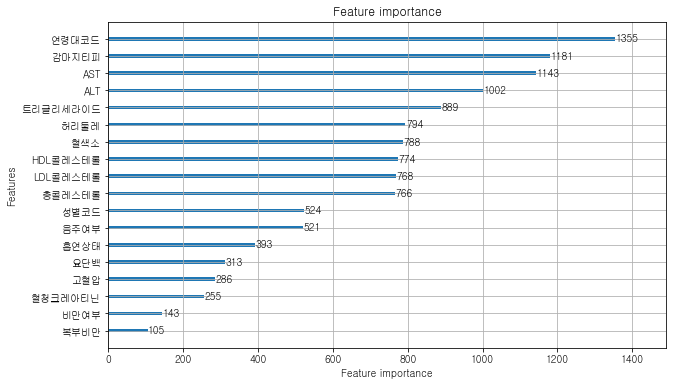

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
plot_importance(model, ax = ax)

In [7]:
df = df[["연령대코드","감마지티피","ALT","AST","트리글리세라이드","식전혈당"]]

In [8]:
from sklearn.preprocessing import StandardScaler

target = df['식전혈당']
data = df.drop(['식전혈당'], axis=1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


X_train , X_test, y_train , y_test = train_test_split(data_scaled, target, test_size=0.25, random_state=0, stratify=target)

In [ ]:
from sklearn.model_selection import KFold,GridSearchCV


# Create parameters to search
gridParams = {
    'learning_rate': [0.005, 0.05, 0.1],
    'num_iterations': [100, 500, 1000],
    'boosting' : ['gbdt','dart','rf','goss'],
    'metric': ['binary'],
    'objective' : ['binary'],
    }


model = LGBMClassifier()


gcv=GridSearchCV(model, param_grid=gridParams, scoring='accuracy', n_jobs=-1)
gcv.fit(X_train, y_train)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_)      # 최고의 점수

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
# 모델 평가를 위한 함수 설정
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred) 
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [10]:
parameters = {
    'objective': 'binary',
    'metric': 'binary',
    'boosting': 'gbdt',
    'learning_rate': 0.01,
    'n_estimators': 1000
}

evals= [(X_test, y_test)]
model = LGBMClassifier(**parameters)
model.fit(X_train, y_train ,early_stopping_rounds=100, eval_metric = 'logloss', eval_set= evals, verbose =True)
y_pred=model.predict(X_test)

[1]	valid_0's binary_logloss: 0.691332
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.689559
[3]	valid_0's binary_logloss: 0.687819
[4]	valid_0's binary_logloss: 0.686114
[5]	valid_0's binary_logloss: 0.684435
[6]	valid_0's binary_logloss: 0.682796
[7]	valid_0's binary_logloss: 0.681186
[8]	valid_0's binary_logloss: 0.679603
[9]	valid_0's binary_logloss: 0.678043
[10]	valid_0's binary_logloss: 0.676513
[11]	valid_0's binary_logloss: 0.675017
[12]	valid_0's binary_logloss: 0.673541
[13]	valid_0's binary_logloss: 0.672088
[14]	valid_0's binary_logloss: 0.670674
[15]	valid_0's binary_logloss: 0.669274
[16]	valid_0's binary_logloss: 0.667902
[17]	valid_0's binary_logloss: 0.666545
[18]	valid_0's binary_logloss: 0.665231
[19]	valid_0's binary_logloss: 0.663921
[20]	valid_0's binary_logloss: 0.662653
[21]	valid_0's binary_logloss: 0.661392
[22]	valid_0's binary_logloss: 0.660149
[23]	valid_0's binary_logloss: 0.658931
[24]	valid_0's binary_loglo

[205]	valid_0's binary_logloss: 0.581991
[206]	valid_0's binary_logloss: 0.581882
[207]	valid_0's binary_logloss: 0.581772
[208]	valid_0's binary_logloss: 0.581652
[209]	valid_0's binary_logloss: 0.581551
[210]	valid_0's binary_logloss: 0.581445
[211]	valid_0's binary_logloss: 0.581342
[212]	valid_0's binary_logloss: 0.581236
[213]	valid_0's binary_logloss: 0.58114
[214]	valid_0's binary_logloss: 0.581029
[215]	valid_0's binary_logloss: 0.580926
[216]	valid_0's binary_logloss: 0.580828
[217]	valid_0's binary_logloss: 0.580732
[218]	valid_0's binary_logloss: 0.580638
[219]	valid_0's binary_logloss: 0.580543
[220]	valid_0's binary_logloss: 0.580453
[221]	valid_0's binary_logloss: 0.580354
[222]	valid_0's binary_logloss: 0.580266
[223]	valid_0's binary_logloss: 0.58017
[224]	valid_0's binary_logloss: 0.580082
[225]	valid_0's binary_logloss: 0.579991
[226]	valid_0's binary_logloss: 0.579896
[227]	valid_0's binary_logloss: 0.579804
[228]	valid_0's binary_logloss: 0.579724
[229]	valid_0's bi

[409]	valid_0's binary_logloss: 0.57251
[410]	valid_0's binary_logloss: 0.572496
[411]	valid_0's binary_logloss: 0.57248
[412]	valid_0's binary_logloss: 0.572467
[413]	valid_0's binary_logloss: 0.572452
[414]	valid_0's binary_logloss: 0.572436
[415]	valid_0's binary_logloss: 0.572423
[416]	valid_0's binary_logloss: 0.572408
[417]	valid_0's binary_logloss: 0.572395
[418]	valid_0's binary_logloss: 0.572381
[419]	valid_0's binary_logloss: 0.572366
[420]	valid_0's binary_logloss: 0.572352
[421]	valid_0's binary_logloss: 0.572338
[422]	valid_0's binary_logloss: 0.572324
[423]	valid_0's binary_logloss: 0.572312
[424]	valid_0's binary_logloss: 0.572297
[425]	valid_0's binary_logloss: 0.572284
[426]	valid_0's binary_logloss: 0.572271
[427]	valid_0's binary_logloss: 0.572258
[428]	valid_0's binary_logloss: 0.572245
[429]	valid_0's binary_logloss: 0.572231
[430]	valid_0's binary_logloss: 0.572219
[431]	valid_0's binary_logloss: 0.572206
[432]	valid_0's binary_logloss: 0.572194
[433]	valid_0's bi

[610]	valid_0's binary_logloss: 0.570996
[611]	valid_0's binary_logloss: 0.570993
[612]	valid_0's binary_logloss: 0.570989
[613]	valid_0's binary_logloss: 0.570985
[614]	valid_0's binary_logloss: 0.570982
[615]	valid_0's binary_logloss: 0.570979
[616]	valid_0's binary_logloss: 0.570976
[617]	valid_0's binary_logloss: 0.570972
[618]	valid_0's binary_logloss: 0.570969
[619]	valid_0's binary_logloss: 0.570966
[620]	valid_0's binary_logloss: 0.570961
[621]	valid_0's binary_logloss: 0.570959
[622]	valid_0's binary_logloss: 0.570955
[623]	valid_0's binary_logloss: 0.570951
[624]	valid_0's binary_logloss: 0.570949
[625]	valid_0's binary_logloss: 0.570945
[626]	valid_0's binary_logloss: 0.570942
[627]	valid_0's binary_logloss: 0.570939
[628]	valid_0's binary_logloss: 0.570937
[629]	valid_0's binary_logloss: 0.570934
[630]	valid_0's binary_logloss: 0.570931
[631]	valid_0's binary_logloss: 0.570929
[632]	valid_0's binary_logloss: 0.570925
[633]	valid_0's binary_logloss: 0.570922
[634]	valid_0's 

[811]	valid_0's binary_logloss: 0.570563
[812]	valid_0's binary_logloss: 0.570562
[813]	valid_0's binary_logloss: 0.570561
[814]	valid_0's binary_logloss: 0.570559
[815]	valid_0's binary_logloss: 0.570558
[816]	valid_0's binary_logloss: 0.570557
[817]	valid_0's binary_logloss: 0.570555
[818]	valid_0's binary_logloss: 0.570553
[819]	valid_0's binary_logloss: 0.570552
[820]	valid_0's binary_logloss: 0.570551
[821]	valid_0's binary_logloss: 0.57055
[822]	valid_0's binary_logloss: 0.570549
[823]	valid_0's binary_logloss: 0.570546
[824]	valid_0's binary_logloss: 0.570546
[825]	valid_0's binary_logloss: 0.570545
[826]	valid_0's binary_logloss: 0.570544
[827]	valid_0's binary_logloss: 0.570543
[828]	valid_0's binary_logloss: 0.570542
[829]	valid_0's binary_logloss: 0.570541
[830]	valid_0's binary_logloss: 0.57054
[831]	valid_0's binary_logloss: 0.570539
[832]	valid_0's binary_logloss: 0.570538
[833]	valid_0's binary_logloss: 0.570536
[834]	valid_0's binary_logloss: 0.570534
[835]	valid_0's bi

In [11]:
get_clf_eval(y_test,y_pred)

오차행렬:
 [[143012  88146]
 [ 50483 180674]]

정확도: 0.7001
정밀도: 0.6721
재현율: 0.7816
F1: 0.7227
AUC: 0.7001


정밀도와 재현율을 높이기 위해선 각각 FP와 FN을 낮춰야 한다.

분류 결정 임계값이 낮아질수록 Positive로 예측할 확률이 높아짐 즉 재현율이 증가

당뇨병은 분류모델은 재현율 높여야됨

In [13]:
# predict_proba 분류결정 예측 확률을 반환
pred_proba = model.predict_proba(X_test)
pred  = model.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (462315, 2)
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.22170883 0.77829117 1.        ]
 [0.33544699 0.66455301 1.        ]
 [0.79868006 0.20131994 0.        ]]


In [14]:
from sklearn.preprocessing import Binarizer
# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차행렬:
 [[117394 113764]
 [ 29207 201950]]

정확도: 0.6907
정밀도: 0.6397
재현율: 0.8736
F1: 0.7386
AUC: 0.6908
임곗값: 0.45
오차행렬:
 [[130077 101081]
 [ 38757 192400]]

정확도: 0.6975
정밀도: 0.6556
재현율: 0.8323
F1: 0.7335
AUC: 0.6975
임곗값: 0.5
오차행렬:
 [[143012  88146]
 [ 50483 180674]]

정확도: 0.7001
정밀도: 0.6721
재현율: 0.7816
F1: 0.7227
AUC: 0.7001
임곗값: 0.55
오차행렬:
 [[156491  74667]
 [ 65095 166062]]

정확도: 0.6977
정밀도: 0.6898
재현율: 0.7184
F1: 0.7038
AUC: 0.6977
임곗값: 0.6
오차행렬:
 [[171117  60041]
 [ 84913 146244]]

정확도: 0.6865
정밀도: 0.7089
재현율: 0.6327
F1: 0.6686
AUC: 0.6865


In [15]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = model.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (426842,)
반환된 precisions 배열의 Shape: (426843,)
반환된 recalls 배열의 Shape: (426843,)
thresholds 5 sample: [0.01561691 0.01561771 0.01562296 0.01563645 0.01565583]
precisions 5 sample: [0.50011791 0.50011683 0.50011791 0.500119   0.50012116]
recalls 5 sample: [1.         0.99999567 0.99999567 0.99999567 0.99999567]
샘플 추출을 위한 임계값 배열의 index 10개: [     0     15     30 ... 426810 426825 426840]
샘플용 10개의 임곗값:  [0.02 0.02 0.02 ... 0.88 0.89 0.9 ]
샘플 임계값별 정밀도:  [0.5   0.5   0.5   ... 0.914 1.    1.   ]
샘플 임계값별 재현율:  [1. 1. 1. ... 0. 0. 0.]


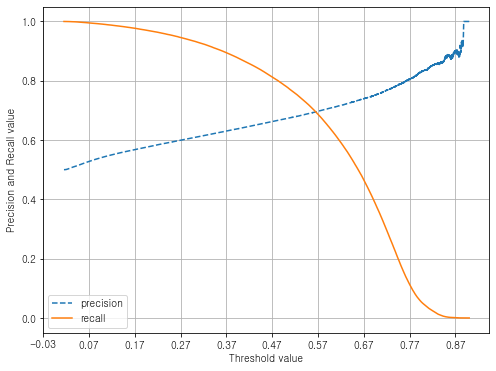

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
 
def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, model.predict_proba(X_test)[:, 1] )